In [8]:
import pandas as pd
%matplotlib inline

# Gestion des données manquantes

Un problème récurent dans la gestion des données provient des données manquantes ou de mauvaises qualités. Nous allons créer un DataFrame factice avec des données manquantes pour illustrer le problème.

In [6]:
df = pd.read_csv("../../data/temperatures.csv", index_col=0)

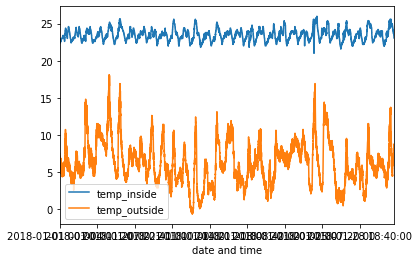

In [7]:
df.plot()

In [12]:
df['temp_inside'] = df['temp_inside'].sample(frac=0.85)
df['temp_outside'] = df['temp_outside'].sample(frac=0.35)

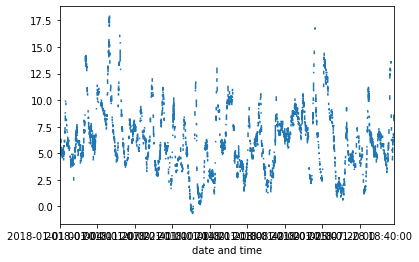

In [15]:
df.temp_outside.plot()

On a donc remplacé des valeurs par `nan` (not a number), et ce de façon aléatoire. Plusieurs choix sont alors possibles :

- retirer toute ligne contenant un `nan` (si on considère qu'une donnée manquante rend la ligne "caduque"
- remplir la valeur manquante par autre chose (interpolation, valeur précédente / suivante / la plus proche)
- laisser un `nan` (mais dans ce cas, certaines méthodes ne fonctionneront pas).

### retirer les lignes contenant des valeurs manquantes

In [30]:
df_wo_nan

,temp_inside,temp_outside
date and time,,
2018-01-01 00:03:00,23.0,7.4
2018-01-01 00:06:00,23.0,7.3
2018-01-01 00:12:00,23.0,7.1
2018-01-01 00:19:00,23.0,7.0
2018-01-01 00:22:00,23.0,7.1
...,...,...
2018-01-31 23:20:00,23.0,8.5
2018-01-31 23:31:00,23.0,8.6
2018-01-31 23:46:00,23.0,8.6


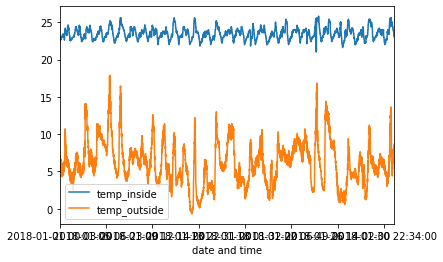

In [32]:
df_wo_nan = df.dropna(axis=0, how="any") # la ligne est retiré si un colonne contient un `nan`
df_wo_nan.plot()

### Interpolation / remplissage

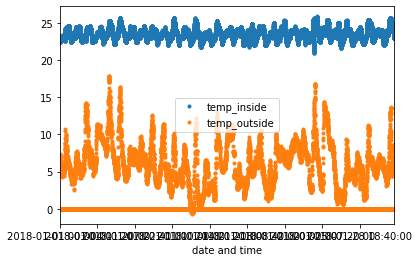

In [35]:
df_wo_nan = df.fillna(value=0) # On fixe une valeur arbitraire
df_wo_nan.plot(marker=".", linestyle="")

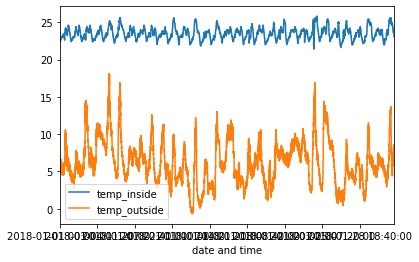

In [39]:
df_wo_nan = df.fillna(method="bfill") # On utilise la dernière valeur valide
df_wo_nan.plot()

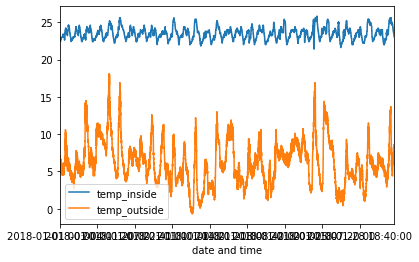

In [41]:
df_wo_nan = df.fillna(method="ffill") # On utilise la prochaine valeur valide
df_wo_nan.plot()

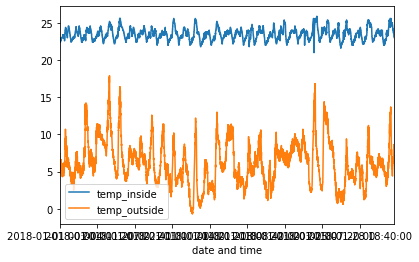

In [36]:
df_wo_nan = df.interpolate(method="linear") # On interpole à partir des valeurs avant / après
df_wo_nan.plot()

In [37]:
df_wo_nan = df.interpolate(method="cubic") # On interpole à partir des valeurs avant / après
df_wo_nan.plot()

ValueError: Index column must be numeric or datetime type when using cubic method other than linear. Try setting a numeric or datetime index column before interpolating.

On a besoin de spécifier un index numérique ou une "vrai" date : dans le premier cas, l'interpolation utilisera les valeurs numériques de l'index. Dans le second, il prendra en compte l'écart de temps entre chaques index.

In [38]:
df.index = pd.to_datetime(df.index)

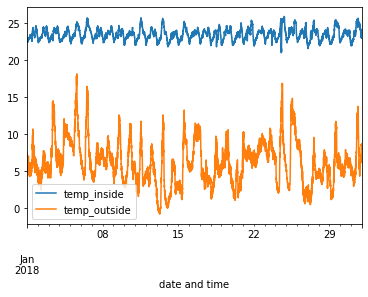

In [40]:
df_wo_nan = df.interpolate(method="cubic") # On interpole à partir des valeurs avant / après
df_wo_nan.plot()

### Exercice : gérer des outliers

In [57]:
df = pd.read_csv("../../data/temperatures.csv", index_col=0,
                 parse_dates=True)
df['temp_inside'] = df['temp_inside'].sample(frac=0.999)
df['temp_outside'] = df['temp_outside'].sample(frac=0.9997)

df_w_outliers = df.fillna(value=pd.DataFrame(np.random.normal(15, 30, size=df.shape), index=df.index, columns=df.columns))


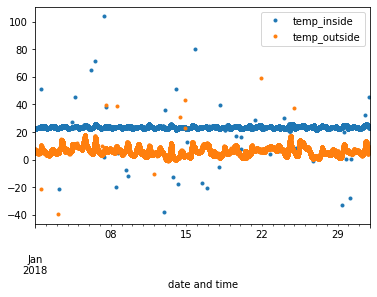

In [58]:
df_w_outliers.plot(marker=".", linestyle="")

**Objectifs:**

- Identifier les outliers
- Les remplacer par des `nan`
- Gérer les "trou" dans les données

In [59]:
temp = df_w_outliers.temp_inside

is_outlier = ((temp > temp.mean() + 3 * temp.std()) |
              (temp < temp.mean() - 3 * temp.std()))
is_outlier

date and time
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-01-31 23:55:00    False
2018-01-31 23:56:00    False
2018-01-31 23:57:00    False
2018-01-31 23:58:00    False
2018-01-31 23:59:00    False
Name: temp_inside, Length: 44640, dtype: bool

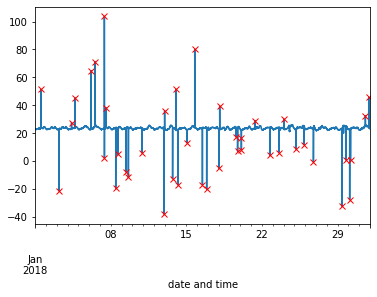

In [61]:
temp.plot()
temp[is_outlier].plot(linestyle="", marker="x", color="red")

In [65]:
temp[is_outlier] = np.nan

In [68]:
temp[temp.isna()]

date and time
2018-01-01 12:59:00   NaN
2018-01-03 04:29:00   NaN
2018-01-04 08:42:00   NaN
2018-01-04 16:35:00   NaN
2018-01-06 04:23:00   NaN
2018-01-06 13:18:00   NaN
2018-01-07 09:43:00   NaN
2018-01-07 09:52:00   NaN
2018-01-07 12:53:00   NaN
2018-01-08 10:56:00   NaN
2018-01-08 15:56:00   NaN
2018-01-09 09:28:00   NaN
2018-01-09 15:04:00   NaN
2018-01-10 21:15:00   NaN
2018-01-12 22:05:00   NaN
2018-01-12 23:36:00   NaN
2018-01-13 17:18:00   NaN
2018-01-14 00:51:00   NaN
2018-01-14 05:54:00   NaN
2018-01-15 01:06:00   NaN
2018-01-15 18:31:00   NaN
2018-01-16 11:34:00   NaN
2018-01-16 21:02:00   NaN
2018-01-18 00:35:00   NaN
2018-01-18 01:58:00   NaN
2018-01-19 14:16:00   NaN
2018-01-19 17:43:00   NaN
2018-01-20 01:56:00   NaN
2018-01-20 02:09:00   NaN
2018-01-21 08:46:00   NaN
2018-01-22 17:30:00   NaN
2018-01-23 13:17:00   NaN
2018-01-24 00:51:00   NaN
2018-01-25 03:25:00   NaN
2018-01-25 21:23:00   NaN
2018-01-26 18:16:00   NaN
2018-01-29 09:58:00   NaN
2018-01-29 18:16:00   Na